In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this, we will use the "Dogs & Cats" dataset that can be downloaded from <a href='https://www.kaggle.com/c/dogs-vs-cats/data'>Kaggle</a>.

In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

#### Seed for reproductibility

Does't seem very useful

## Setup Model Architecture

### Input 
`The shape for input should be (150, 150, 3)`

In [3]:
inputs = keras.Input(shape=(150,150,3))
inputs

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_1')>

### Conv2D
`Next, create a covolutional layer (Conv2D)`
- Use 32 filters
- Kernel size should be (3, 3) (that's the size of the filter)
- Use 'relu' as activation`



In [4]:
conv2D = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
conv2D

<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d')>

### Pool 
`Reduce the size of the feature map with max pooling (MaxPooling2D)`
- Set the pooling size to (2, 2)


In [5]:
pool = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2D)
pool

<KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d')>

### Flatten
`Turn the multi-dimensional result into vectors using a Flatten layer`

In [6]:
vector = keras.layers.Flatten()(pool)
vector

<KerasTensor: shape=(None, 175232) dtype=float32 (created by layer 'flatten')>

### Dense
`Next, add a Dense layer with 64 neurons and 'relu' activation`

In [7]:
inner = keras.layers.Dense(64, activation='relu')(vector)
inner

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>

### Output
`Finally, create the Dense layer with 1 neuron - this will be the output`
- The output layer should have an activation - use the appropriate activation for the binary classification case

In [8]:
outputs = keras.layers.Dense(1, activation='sigmoid')(inner) # activation='sigmoid'
outputs

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

### Init model

In [9]:
model = keras.Model(inputs, outputs)
model

### Optimizer & Loss
`As optimizer use SGD with the following parameters`
- SGD(lr=0.002, momentum=0.8)


In [10]:
optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
#optimizer = keras.optimizers.Adam(learning_rate=0.01)
optimizer

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

In [11]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
loss

In [12]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

***
## Question 1

Since we have a binary classification problem, what is the best loss function for us?
***

`ANSWER`: Binary Cross Entropy

***
## Question 2

What's the total number of parameters of the model? You can use the summary method for that.
***

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

`ANSWER`: 11,215,873

***
## Generators and Training

For the next two questions, use the following data generator for both train and validation:

`ImageDataGenerator(rescale=1./255)`

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20

In [14]:
from keras.preprocessing.image import load_img
from os import path

In [15]:
img_size=150
batch_size=20

### Load 1 image

### Prepare generators

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(rescale=1./255) # , preprocessing_function=None
train_gen

In [18]:
valid_gen = ImageDataGenerator(rescale=1./255) # , preprocessing_function=None
valid_gen

### Load `training` & `validation` images

In [19]:
base = 'data/cat_dog_NN'
train_dir = path.join('.', base, 'train')
valid_dir = path.join('.', base, 'validation')
valid_dir

'./data/cat_dog_NN/validation'

In [20]:
train_ds = train_gen.flow_from_directory(
    train_dir, 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

Found 20000 images belonging to 2 classes.


In [21]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [22]:
valid_ds = valid_gen.flow_from_directory(
    valid_dir, 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [23]:
valid_ds.class_indices

{'cats': 0, 'dogs': 1}

### Fit the model

In [24]:
from tqdm.keras import TqdmCallback

In [25]:
history = model.fit(
    train_ds,
    epochs=10,
    steps_per_epoch=100,
    validation_data=valid_ds,
    validation_steps=50,
    callbacks=[TqdmCallback()],
    verbose=1,
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/10
100/100 [==============================] - 20s 200ms/step - loss: 0.7135 - accuracy: 0.5640 - val_loss: 0.7303 - val_accuracy: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 21s 208ms/step - loss: 0.6719 - accuracy: 0.5465 - val_loss: 1.5806 - val_accuracy: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 21s 208ms/step - loss: 0.7171 - accuracy: 0.5635 - val_loss: 0.7851 - val_accuracy: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 24s 241ms/step - loss: 0.6942 - accuracy: 0.4825 - val_loss: 0.7053 - val_accuracy: 0.0800
Epoch 5/10
100/100 [==============================] - 21s 208ms/step - loss: 0.6905 - accuracy: 0.5015 - val_loss: 0.7067 - val_accuracy: 0.2420
Epoch 6/10
100/100 [==============================] - 20s 202ms/step - loss: 0.6882 - accuracy: 0.5385 - val_loss: 0.7083 - val_accuracy: 0.2300
Epoch 7/10
100/100 [==============================] - 22s 222ms/step - loss: 0.6860 - accuracy: 0.5890 - val_loss: 0.6

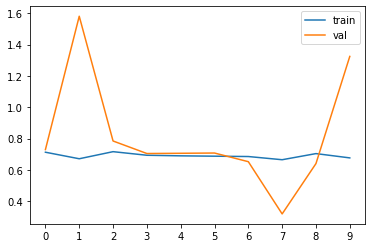

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xticks(np.arange(10))
plt.legend()

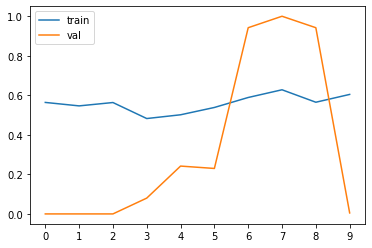

In [27]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

***
## Question 3

What is the median of training accuracy for this model?
***

In [28]:
import pandas as pd

In [29]:
pd.Series(history.history['accuracy']).median()

0.5637499988079071

**Results history at the end of the notebook**

`ANSWER`: 0.56 ?
<div style='color:#FF0000'>a valider</div>

***
## Question 4

What is the standard deviation of training loss for this model?
***

In [30]:
np.array(history.history['loss']).std(ddof=0)

0.01616039808707633

In [31]:
pd.Series(history.history['loss']).std()

0.01703455528339643

**Results history at the end of the notebook**

`ANSWER`: 0.01 ?
<div style='color:#FF0000'>a valider</div>

***
## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:
- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'
***

In [32]:
train_gen_augmented = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=None, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen_augmented

In [33]:
train_ds_augmented = train_gen_augmented.flow_from_directory(
    train_dir, 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

Found 20000 images belonging to 2 classes.


***
## Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for the model trained with augmentations?
***

In [34]:
history_augmented = model.fit(
    train_ds_augmented,
    epochs=10,
    steps_per_epoch=100,
    validation_data=valid_ds,
    validation_steps=50,
    callbacks=[TqdmCallback()],
    verbose=1,
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/10
100/100 [==============================] - 28s 277ms/step - loss: 0.6757 - accuracy: 0.5840 - val_loss: 0.6212 - val_accuracy: 0.9370
Epoch 2/10
100/100 [==============================] - 28s 280ms/step - loss: 0.6796 - accuracy: 0.5900 - val_loss: 0.8763 - val_accuracy: 0.0610
Epoch 3/10
100/100 [==============================] - 29s 289ms/step - loss: 0.6680 - accuracy: 0.6065 - val_loss: 1.4529 - val_accuracy: 0.0090
Epoch 4/10
100/100 [==============================] - 29s 288ms/step - loss: 0.6993 - accuracy: 0.5445 - val_loss: 0.5865 - val_accuracy: 0.9640
Epoch 5/10
100/100 [==============================] - 31s 307ms/step - loss: 0.6855 - accuracy: 0.5880 - val_loss: 0.5634 - val_accuracy: 0.9940
Epoch 6/10
100/100 [==============================] - 30s 303ms/step - loss: 0.6785 - accuracy: 0.5935 - val_loss: 0.6242 - val_accuracy: 0.9280
Epoch 7/10
100/100 [==============================] - 32s 315ms/step - loss: 0.6830 - accuracy: 0.5465 - val_loss: 1.2164 - val_ac

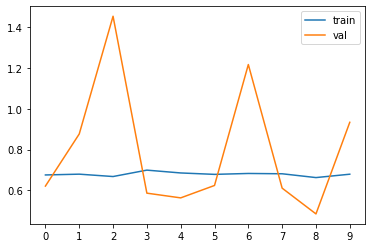

In [35]:
plt.plot(history_augmented.history['loss'], label='train')
plt.plot(history_augmented.history['val_loss'], label='val')
plt.xticks(np.arange(10))
plt.legend()

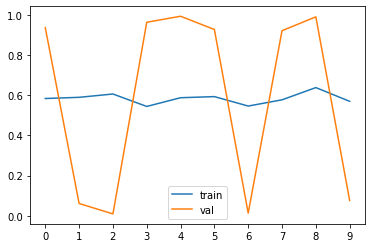

In [36]:
plt.plot(history_augmented.history['accuracy'], label='train')
plt.plot(history_augmented.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [37]:
pd.Series(history_augmented.history['val_loss']).mean()

0.7970493465662003

**Results history at the end of the notebook**

`ANSWER`: 0.67 ?
<div style='color:#FF0000'>a valider</div>

***
### Question 6

What is the standard deviation of validation accuracy for the model trained with augmentations?
***

In [38]:
pd.Series(history_augmented.history['val_accuracy']).std()

0.4741418520955114

**Results history at the end of the notebook**

`ANSWER`: No choice yet in the form<div style='color:#FF0000'>a valider</div>

### Results' comparisons

In [45]:
Q3 = np.array([
    0.5099999904632568, #(from_logits=True & activation=None & batch_size=32)
    0.5079687535762787, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.5167187452316284, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.5424999892711639, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.4920312464237213, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.4968749880790710, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.528124988079071,  #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.5049999952316284, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.4847500026226043, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5637499988079071, #(from_logits=False & activation='sigmoid' & batch_size=20)
])
Q3.std(), Q3.var(), Q3.mean()

(0.02291962349881258, 0.0005253091413273219, 0.5147718697786331)

In [46]:
Q4 = np.array([
    0.01770461249596647, #(from_logits=True & activation=None & batch_size=32)
    0.02163280253055086, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.00671274811618648, #(from_logits=False & activation='sigmoid' & batch_size=32) !
    0.02022200281446467, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.01097479938158576, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.00405094188794689, #(from_logits=False & activation='sigmoid' & batch_size=32) !
    0.02018709408811227, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.00916966043551551, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01163930784486423, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01703455528339643, #(from_logits=False & activation='sigmoid' & batch_size=20)
])
Q4.std(), Q4.var(), Q4.mean()

(0.0059015709963914495, 3.4828540225448766e-05, 0.013932852487858957)

In [47]:
Q5 = np.array([
    0.719238418340683,  #(from_logits=True & activation=None)
    0.6899284362792969, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.7183369338512421, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.7208340525627136, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.6942334115505219, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.6979979813098908, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.7356114387512207, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.6841434001922607, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.716226440668106,  #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.7970493465662003, #(from_logits=False & activation='sigmoid' & batch_size=20)
])
Q5.std(), Q5.var(), Q5.mean()

(0.030768334173031688, 0.0009466903877833495, 0.7173599860072136)

In [48]:
Q6 = np.array([
    0.0180913280411857, #(from_logits=True & activation=None & batch_size=32)       !
    0.3564355199573978, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.3062359688388245, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.3475699082481783, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.3880283136295986, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.4312848003363450, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.3580108473331330, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.5047106561702475, #(from_logits=False & activation='sigmoid' & batch_size=20) !
    0.2000251436315092, #(from_logits=False & activation='sigmoid' & batch_size=20) !
    0.4741418520955114, #(from_logits=False & activation='sigmoid' & batch_size=20) !
])
Q6.std(), Q6.var(), Q6.mean()

(0.13444304946693691, 0.018074933549969245, 0.3384534338281931)